In [1]:
# import the libraries first

from __future__ import absolute_import, division, print_function
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## load the data
fashion_mnist = keras.datasets.fashion_mnist
## https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## trai test split of sklearn -> 75 : 25 

In [3]:
## Next, we are going to map the images into classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Exploring the data
print(train_images.shape)

# Each label is between 0-9
print(train_labels)

print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


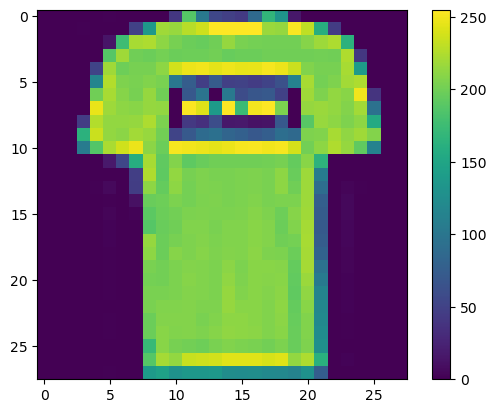

In [5]:
## Visualise some data.
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## If we inspect the first image in the training set, 
## we will see that the pixel values fall in the range of 0 to 255.

In [6]:
# Pre-processing of the data

# We have to scale the images from 0-1 to feed it into the Neural Network

train_images = train_images / 255.0

test_images = test_images / 255.0

# StandardScalar , MiniMaxScalar , ... Scaling or Normalization

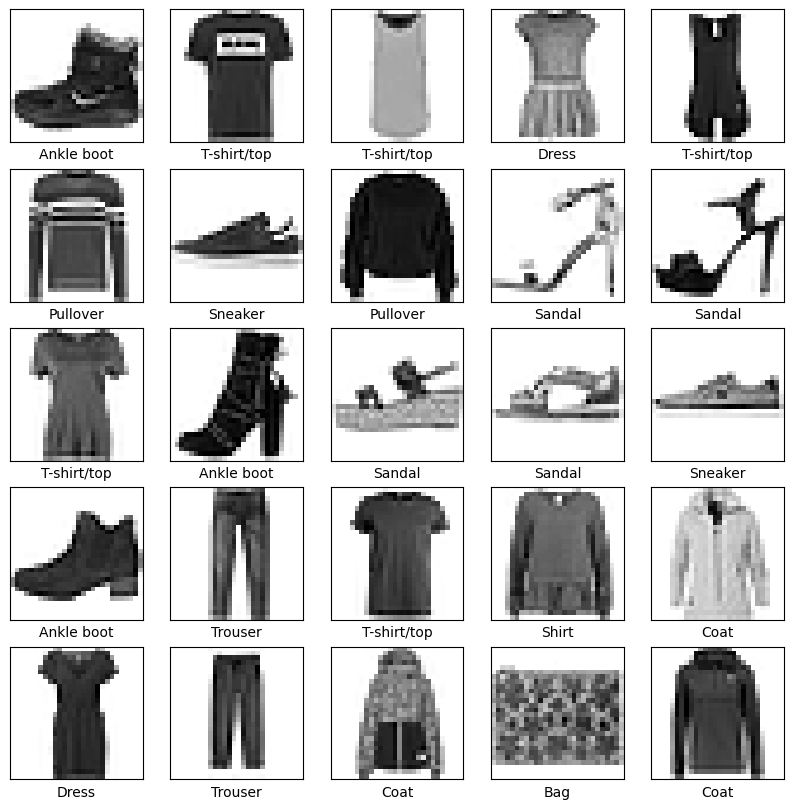

In [7]:
# Let's display some images.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [8]:
# Setup the layers.  This is just a DNN.  No Convo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Summation of such 784 N   ==> i * w + b  => Decision making => AF
# AF : Tanh , Sigmoid , Relu
# 99% of times -> ReLu ( linear for +ve values  )  -> Dense -> intermidate layers

# 99% of the times -> Last layer -> Classification -> Sigmoid or Softmax
# Sigmoid -> Binary Classn
# Softmax -> Multi Classn

C:\Users\SOUPARNA\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Now let's Compile the Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model with 4 layers -> converted into Low level -> binary form

# optimizer -> decides how Back Propgation will happen -> w , b tuning
# loss='sparse_categorical_crossentropy'  --> minimize

# metrics=['accuracy'] -> measurement we as dev plan to check out.
# What if accuracy is increasing only in case of Training and not testing ? 
# ANS : Overfitting

In [10]:
# Model Training
model.fit(train_images, train_labels, epochs=10 , batch_size = 64) # Supervised Learning

# 1 run over entire dataset of 60000  -> 1 epoch
# epochs=10 => 10 iterations => 10 times w, b got updated

# Batch size 
# default batch_size = 32 in keras, i.e 
# o/p : 60000 / 32 = 1875
# 32 images * 1875 batches in each epoch  
# 1875 (w,b) update
# 10 epochs * 1875 = 18750 chances to update the w,b

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7633 - loss: 0.6958
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8586 - loss: 0.3914
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8729 - loss: 0.3421
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8824 - loss: 0.3140
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8894 - loss: 0.2981
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8956 - loss: 0.2789
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8991 - loss: 0.2707
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9011 - loss: 0.2602
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9084 - loss: 0.2466
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9094 - loss: 0.2394


In [11]:
# Evaluating Accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

# 10000/32 = 312.5 ~ 313

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8795 - loss: 0.3504
Test accuracy: 0.8812999725341797


In [12]:
# Making Predictions
predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([6.2203533e-08, 1.7031202e-07, 1.8755988e-07, 1.3136044e-08,
       8.3332829e-08, 1.5399643e-04, 2.5485525e-07, 7.0296302e-03,
       4.0145999e-08, 9.9281561e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

# Model is most confident that it's an ankle boot. Let's see if it is correct

9

In [14]:
test_labels[0]

9

In [15]:
# Now, it’s time to look at the full set of 10 channels

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [16]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

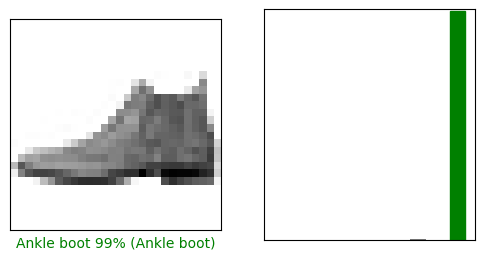

In [17]:
# Let’s look at the 0th and 10th image first
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

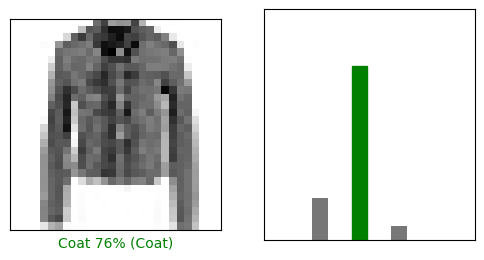

In [18]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

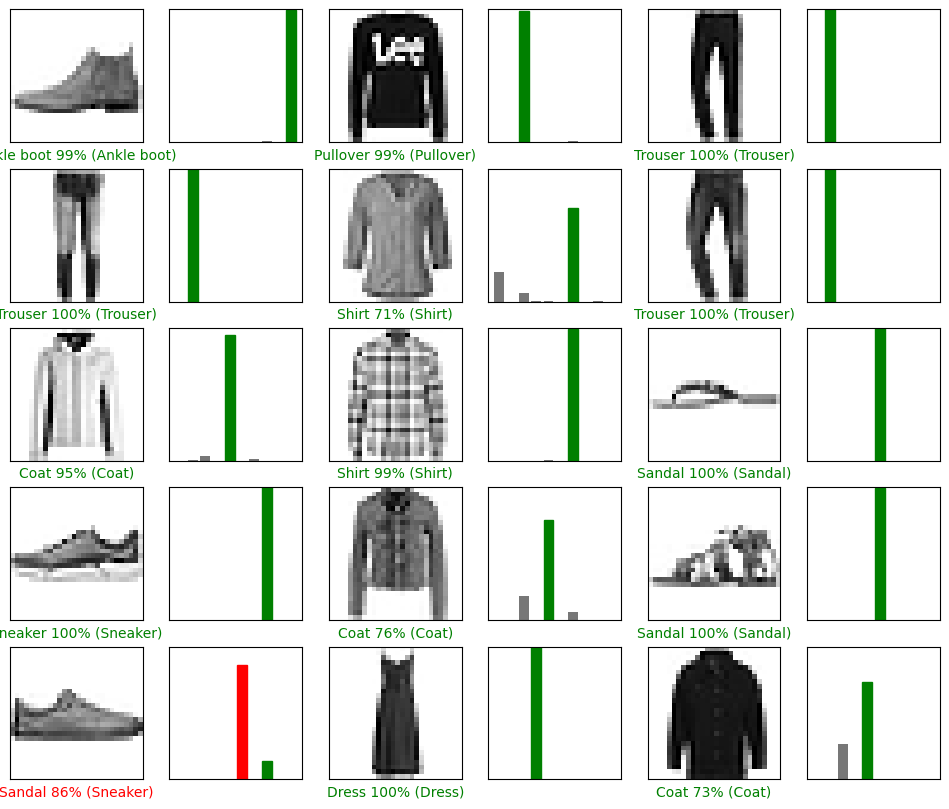

In [19]:
# Now, let’s plot several images and their predictions. 
# Correct ones are green, while the incorrect ones are red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [20]:
# Finally, we will use the trained model to make a prediction about a single image.
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[6.2203533e-08 1.7031218e-07 1.8756005e-07 1.3136070e-08 8.3332829e-08
  1.5399657e-04 2.5485576e-07 7.0296237e-03 4.0146151e-08 9.9281561e-01]]


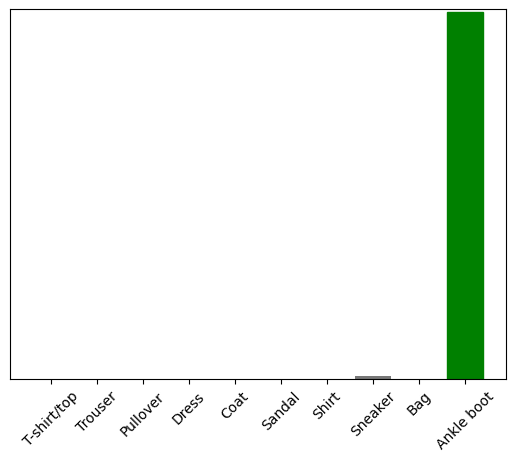

In [21]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [22]:
# we can see the prediction for our only image in batch.
prediction_result = np.argmax(predictions_single[0])
prediction_result

9